# Objetivo

O objetivo desse projeto é criar um modelo de aprendizado de máquina que prever com precisão o diagnóstico de um paciente que tem ou não diabetes, com base em certas medições clínicas disponíveis no conjunto de dados disponibilizados pelo __Institute of Diabetes and disgestive and Kidney Disesases__, através do Kaggle (comunidade online para cientistas de dados e profissionais de aprendizado de máquina da Google LLC) e pode ser obtido no link abaixo. 

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


## Técnicas aplicadas

* Correlação de Pearson;
* Regressão Logística;
* Métricas de performance do modelo: 
  * Precision
  * Sensibilidade
  * Especificidade
  * Curva ROC/AUC
  * KS
* Interpretação do Modelo;
* Otimização e ajustes.

## Importação das bibliotecas utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats

## 1. Preparação dos Dados

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

<br><br>
__A base não tem valores duplicados ou nulos__
<br><br>

## 2. Análise Exploratória 

#### Dicionário de dados

| Variável | Descrição |
| ------ | ------ |
| Pregnancies | Qte de filhos |
| Glucose | Glicose após teste de duas horas |
| BloodPressure | Pressão arterial |
| SkinThickness | Espessura da dobra cutânea do tríceps |
| Insulin | Insulina após teste de duas horas |
| BMI | IMC |
| DiabetesPedigreeFunction | Score de hereditariedade para Diabetes |
| Age | Idade |
| Outcome | 1 se tem diabetes e 0 caso contrário |

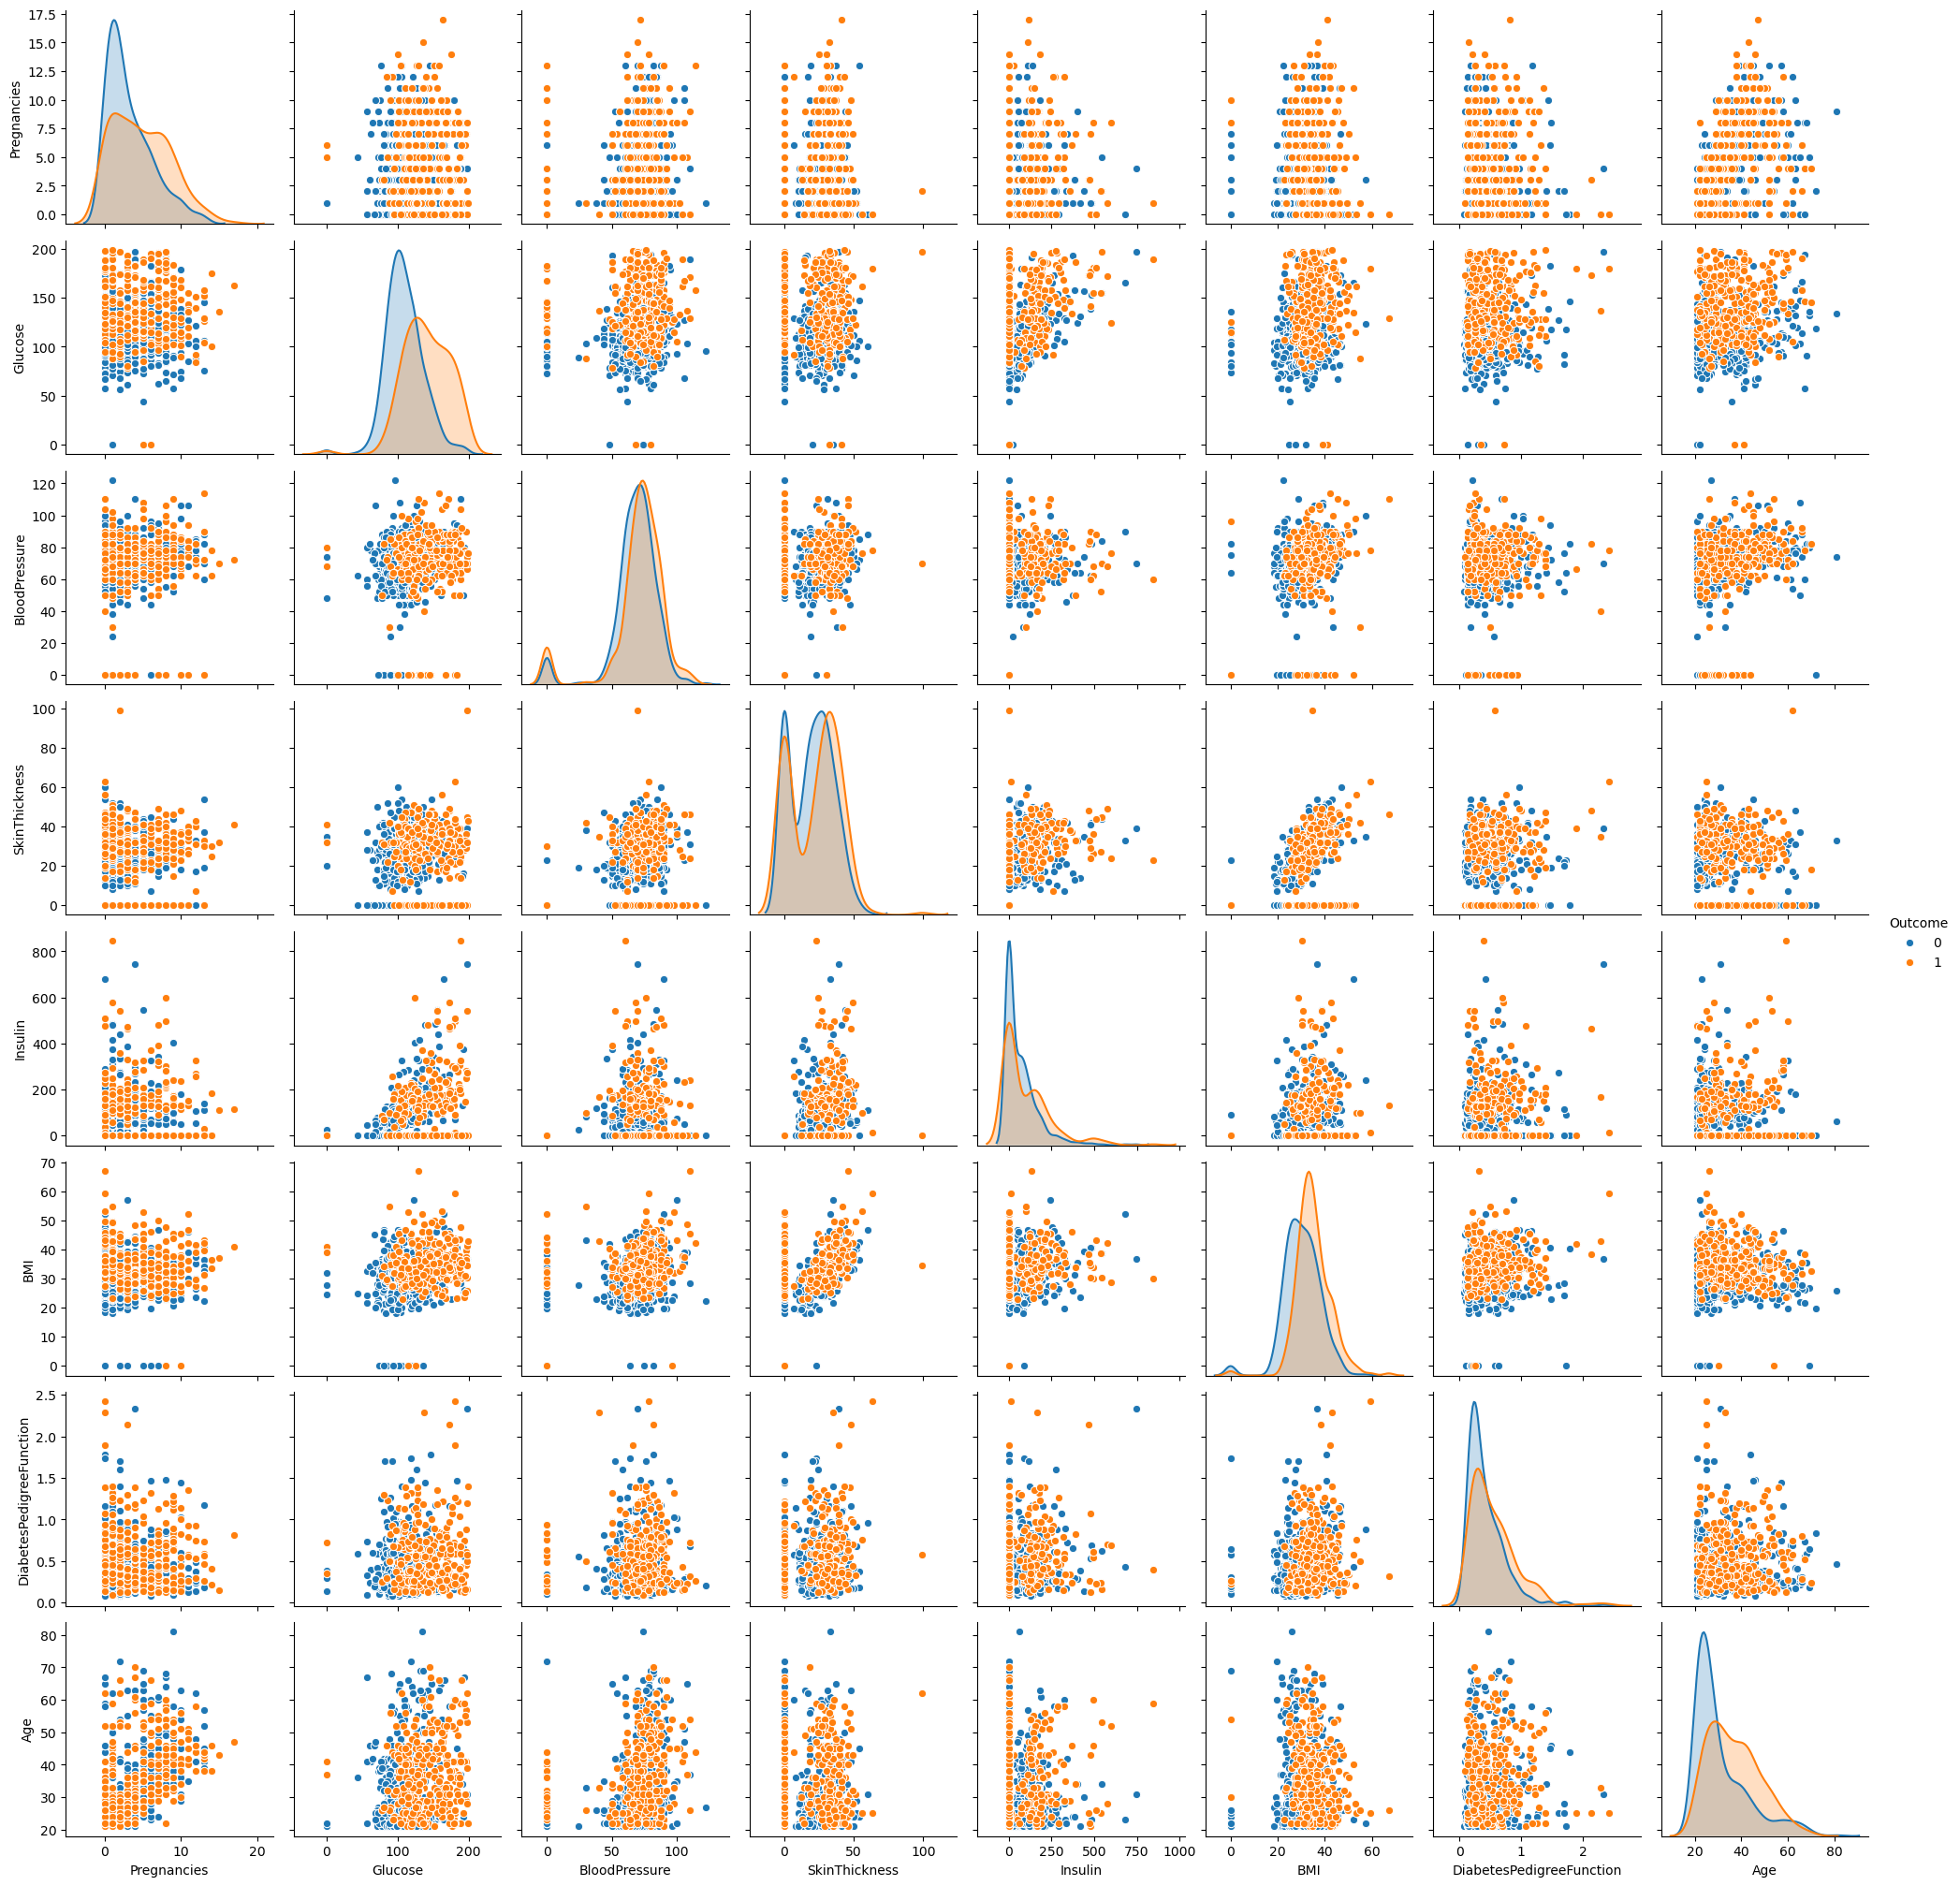

In [6]:
sns.pairplot(df,hue="Outcome")

Aparentemente, as variáveis que podem ter maior influência na separação dos diabéticos são __Glicose, IMC, Qtd de filhos__ e __idade__.

## 2.1 Coeficiente Correlação de Pearson

A correlação de Pearson, mede o grau da correlação linear entre duas variáveis quantitativas.

Este coeficiente, assume apenas valores entre -1 e +1 e indica:

* Coeficiente __próximo de +1:__ correlação positiva forte.
* Coeficiente __próximo de 0:__ as variáveis não dependem linearmente uma da outra, ou seja, correlação pearson inexistene.
* Coeficiente __próximo de -1:__ correlação negativa forte.




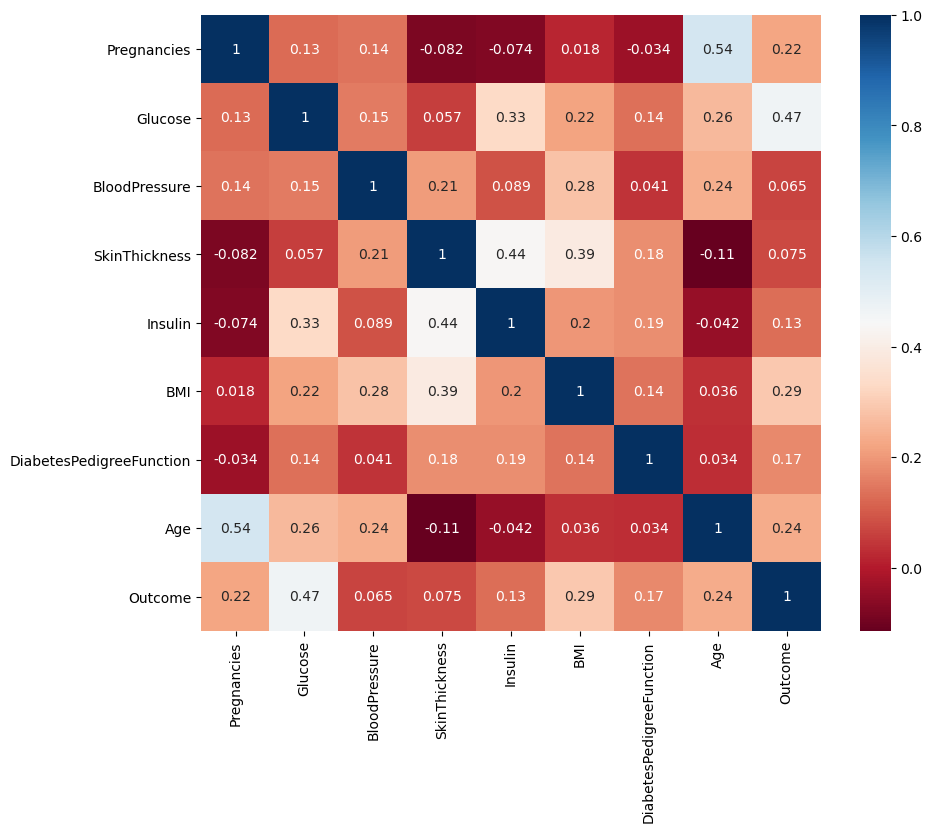

In [7]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.corr(),cmap='RdBu', annot=True)

<br><br>As variáveis apresentam pouco relação entre si.<br>E importante esse avaliação para evitarmos problema de multicolineridades que pode comprometer o ajuste do modelo, uma vez prejudica a estimação dos coeficientes e a interpretabilidade.
<br><br>

## 3. Ajuste do Modelo de Regressão Logística

In [8]:
y = df.Outcome #Definição da variável Target.
x = df.drop("Outcome",axis=1) #Definição das variáveis explicativas para o modelo.

In [9]:
modelo = LogisticRegression(fit_intercept=True, random_state=42, max_iter=500)
modelo.fit(x,y)

LogisticRegression(max_iter=500, random_state=42)

In [13]:
#Incorporando a chance (probabilidade) do paciente ter diabete e predição do diagnóstico do modelo em um novo dataframe. 
df2 = df.copy()
df2['Prob'] = modelo.predict_proba(x)[:,1]
df2['Diabete_Predito'] = modelo.predict(x) 
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prob,Diabete_Predito
0,6,148,72,35,0,33.6,0.627,50,1,0.719412,1
1,1,85,66,29,0,26.6,0.351,31,0,0.049281,0
2,8,183,64,0,0,23.3,0.672,32,1,0.792418,1
3,1,89,66,23,94,28.1,0.167,21,0,0.042726,0
4,0,137,40,35,168,43.1,2.288,33,1,0.889672,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.323805,0
764,2,122,70,27,0,36.8,0.340,27,0,0.321327,0
765,5,121,72,23,112,26.2,0.245,30,0,0.172968,0
766,1,126,60,0,0,30.1,0.349,47,1,0.286886,0


## 4. Métricas de performance do modelo

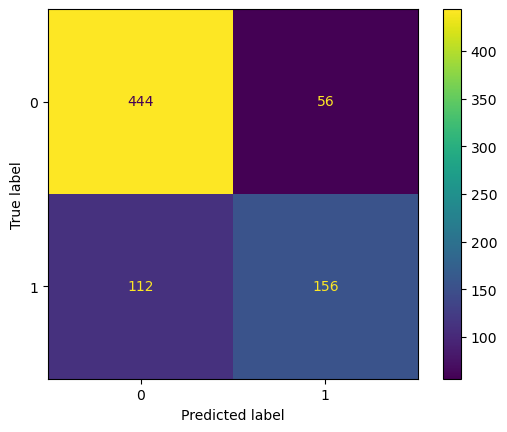

In [18]:
cm = confusion_matrix(df2.Outcome, df2['Diabete_Predito'])
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [19]:
print(classification_report(df2.Outcome, df2.Diabete_Predito))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768



### 4.1 Precisão

A __precisão__ do modelo é a taxa entre os positivos identificados corretamente (verdadeiros positivos) e todos os positivos identificados, ou seja, de todos que o modelo disse que são positivos, quantos de fato foram.
Esse modelo apresentou uma precisão de __`74%`__.

### 4.2 Sensibilidade/Recall (TPR - True Positive Rate)
A __sensibilidade__, também conhecido como __recall__ mede a proporção de obervações positivos que foram corretamente identificados pelo modelo, ou seja, de todos que de fato são positivos, a sensibilidade é a taxa do que o modelo identificou corretamente, que foi de __`58%`__.

### 4.3 Especificidade (TNR - True Negative Rate)

A __especificidade__ é a porcentagem de amostras negativas identificadas corretamente sobre o total de amostras negativas, ou seja, de todos que de fato são negativos, a taxa das observações que foram identificados corretamente é de __`89%`__.

### 4.4 Curva ROC do Modelo

In [21]:
fpr, tpr, thresholds = roc_curve(df2.Outcome, df2.Prob)

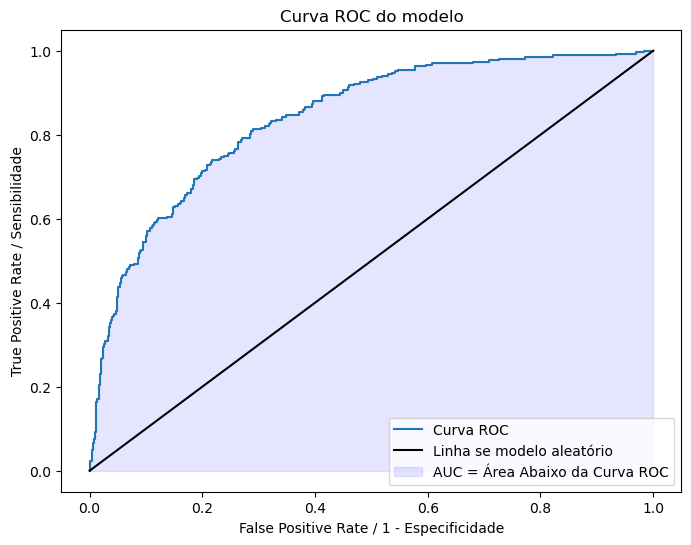

In [22]:
plt.figure(figsize=(8,6))

plt.plot(fpr,tpr, label='Curva ROC') # Plotando a curva ROC
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC') 
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Linha se modelo aleatório') 

plt.title("Curva ROC do modelo")
plt.ylabel('True Positive Rate / Sensibilidade')
plt.xlabel('False Positive Rate / 1 - Especificidade')
plt.legend();

A curva ROC é uma representação visual do desempenho do modelo em todos os limites, essa curva determina a relação da Sensibilidade e o complemento da Especificidade (1 - TNR) para cada corte de probabilidade (treshold) do modelo, para definir se é diabético ou não. 
A área abaixo da curva é o AUC, que é uma das principais métricas para medir a discriminação do modelo.
<br>__Benchmark:__ Quanto mais próximo de 100% a AUC for, __melhor é o modelo__. Modelos entre 50% e 60% são considerados de __baixa discriminação__.

In [25]:
 # Determinação do AUC 
roc_auc_score(df2.Outcome,df2.Prob)

0.8391044776119403

O __AUC__ do modelo é de __`84%`__

### 4.5 KS (Kolmogorov-Smirnov)
A métrica de desempenho KS, mede a habilidade de um modelo em distinguir entre duas classes ao longo de diferentes pontos de corte.
Ela é baseada na diferença absoluta entre os percentuais acumulados de target 1, e os percentuais acumulados de target 0.
<br>Esse indicador é comumente utilizado no mercado financeiro.
<br><br><br>
__Benchmark*__ utilizado no mercado financeiro

|KS|Nível de discriminação|
|----------|----------|
| < 0,02  | Baixo |
| 0,02 a 0,25 | Baixo/Aceitável |
| 0,25 a 0,30 | Bom  |
| 0,30 a 0,50 | Muito Bom |
| 0,50 a 0,60 | Excelente |
| 0,60 a 0,70 | Valores Poucos Usuais |
| Maior que 0,70 |



In [27]:
# Determinação do KS
prob_y_real_0 = df2.loc[df2.Outcome==0,"Prob"]
prob_y_real_1 = df2.loc[df2.Outcome==1,"Prob"]
stats.ks_2samp(prob_y_real_0,prob_y_real_1).statistic

0.5237014925373135

O __KS__ do modelo é de __`52,4%`__

## 5. Interpretação do modelo

Para o corte padrão de probabilidade 0,5, interpretamos:

- **Precision:** 0,74 >> De todos os pacientes que o modelo classificou como diabéticos, 74% realmente estavam diabéticos.<br>
- **Sensibilidade/Recall:** 0,58 >> De todos os pacientes realmente estavam diabéticos, o modelo classificou como diabéticos apenas 58%.<br>
- **Especificidade:** 0.89 >> De todos os pacientes que **não** estavam diabéticos, o modelo classificou como não diabéticos 89%.<br>

Ao usar esse modelo para definir se um paciente tem diabete, precisamos diminuir a quantidade de falsos negativos com maior prioridade, pois é mais perigoso não diagnosticar um paciente que realmente tem diabetes do que dizer que alguém que não tenha diabetes deva fazer um tratamento de diminuição de açúcar ou melhora da capacidade física.

Portanto, para diminuir os falsos negativos, **precisamos de modelos com melhores sensibilidades (recall)**.

## 6. Otimização do modelo.

Para melhorar a sensibilidade do modelo, vamos encontrar o melhor corte de probabilidade em que maximizamos a taxa de verdadeiros positivos.

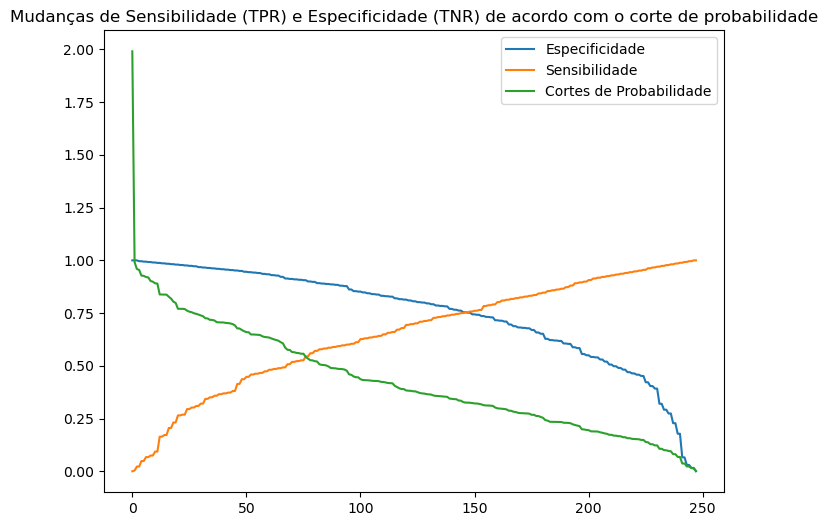

In [28]:
plt.figure(figsize=(8,6))

plt.plot(1-fpr,label='Especificidade')
plt.plot(tpr,label='Sensibilidade')
plt.plot(thresholds,label='Cortes de Probabilidade')
         
plt.legend()
plt.title("Mudanças de Sensibilidade (TPR) e Especificidade (TNR) de acordo com o corte de probabilidade");

Ao analisarmos o gráfico acima, percebemos que a especificidade e a sensibilidade apresentam comportamento inverso. Ao aumentar um, o outro diminui. Portanto, para a consideração sobre qual métrica iremos priorizar, é importante levar em consideração a pergunta de negócio, e as consequencias que cada inconsistencia pode resultar. 
<br><br>
Para esse problema em específico, talvez um valor de corte superior a __0,25__ pode __aumentar a sensibilidade__ sem perder tanta __especificidade__.

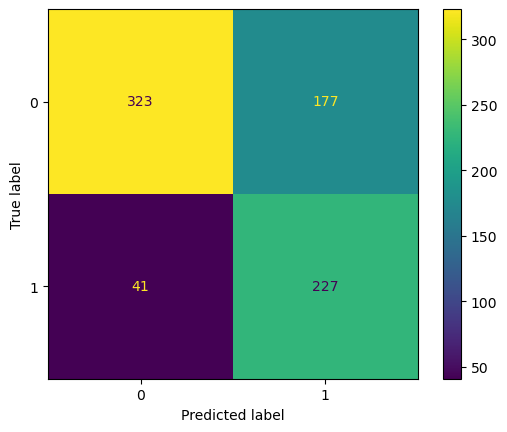

In [31]:
df2['Diabete_Predito'] = np.where(df2.Prob>0.25,1,0)
cm2 = confusion_matrix(df2.Outcome, df2.Diabete_Predito)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot()

Ao alterarmos o corte de probabilidade, perceba que reduzimos em __`63,4%`__ o número de falsos negativos.

In [36]:
print(classification_report(df2.Outcome, df2.Diabete_Predito))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       500
           1       0.56      0.85      0.68       268

    accuracy                           0.72       768
   macro avg       0.72      0.75      0.71       768
weighted avg       0.77      0.72      0.72       768



E sensibilidade do modelo aumentou de __`58%`__ para __`85%`__.

## Conclusão
Neste projeto, desenvolvemos um modelo de aprendizado de máquina para prever o diagnóstico de diabetes utilizando medições clínicas. 

O modelo apresentou uma __precisão de 74%__, o que significa que, dos pacientes classificados como diabéticos, __74% de fato tinham a doença__. A __sensibilidade__, no entanto, foi de __58%__, indicando que o modelo não identificou todos os casos positivos. A __especificidade__ foi de __89%__, evidenciando uma boa capacidade de identificar corretamente aqueles que não têm diabetes.

Em um problema como o diagnóstico de diabetes, é crucial minimizar os falsos negativos, pois a não detecção de um paciente diabético pode trazer sérios riscos. Ajustamos, então, o __corte de probabilidade para 0,25__, o que resultou em uma redução de __63,4%__ nos falsos negativos, e __aumento da sensibilidade para 85%__, frente a 58% antes aferido,o que aumentou a eficácia na identificação dos pacientes. Uma observação importante é o comportamento inverso entre sensibilidade e especificidade, onde ao aumentar um, o outro diminui.

Este trabalho demonstra o poder da regressão logística, que pode ser aplicada em uma variedade de contextos além da área de saúde, como finanças e marketing. Contudo, o modelo criado aqui não é exaustivo. Em uma nova abordagem, utilizando redes neurais artificiais (RNA), conseguimos atingir __98% de sensibilidade__ com o mesmo conjunto de dados, o que seria o ideal para uso em ambientes clínicos. Essa técnica será abordada em um próximo case, mostrando seu potencial para elevar ainda mais a precisão do diagnóstico.